# K-Means
## Programming Language: Python

In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(index=str, columns={'Annual Income (k$)': 'AnnualIncome',
                              'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


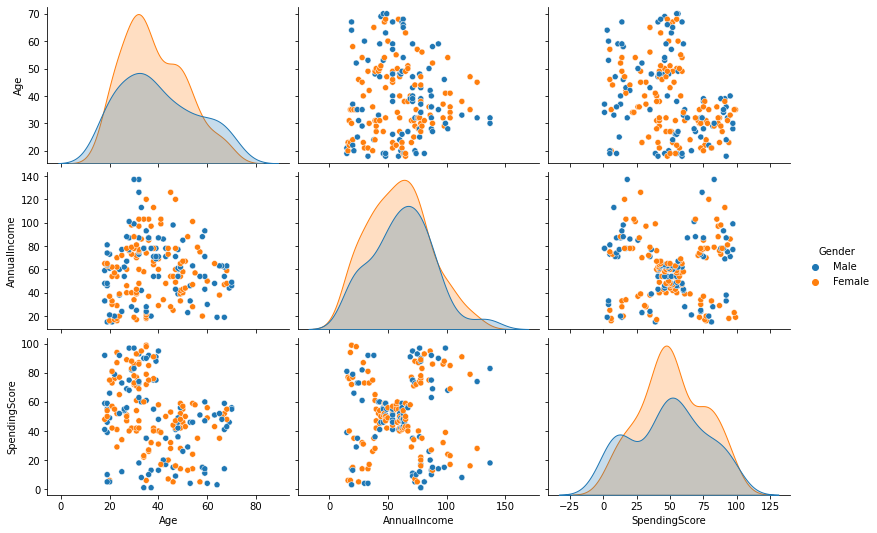

In [4]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5) # hue = group by
plt.show()

X = df.drop(['CustomerID', 'Gender'], axis=1)

From the above plot we see that gender has no direct relation to segmenting customers. 
Therefore, we can drop it and move on with other features which is why we will use X parameter from now on.

In [5]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11): # create 1 to 10 clusters
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

# clusters

C:\Users\yurui\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


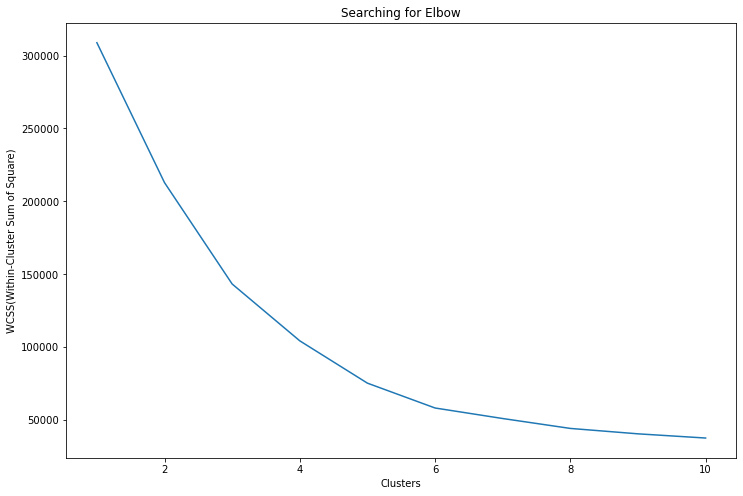

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('WCSS(Within-Cluster Sum of Square)')

# Annotate arrow
#ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             #arrowprops= dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

#ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             #arrowprops= dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Elbow graph tells us to select the cluster when there is a significant change in plot. As we can see from the graph, we can say this may be either 3 or 5. Let's see both results in graph and decide.

C:\Users\yurui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


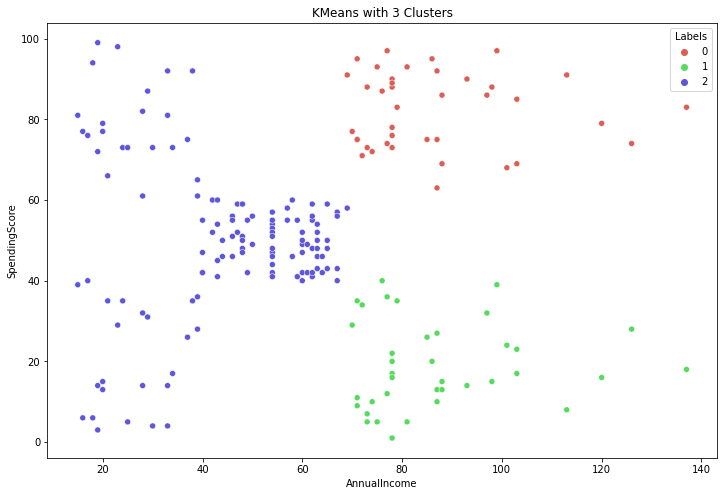

In [13]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(X['AnnualIncome'], X['SpendingScore'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))

plt.title('KMeans with 3 Clusters')
plt.show()

C:\Users\yurui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


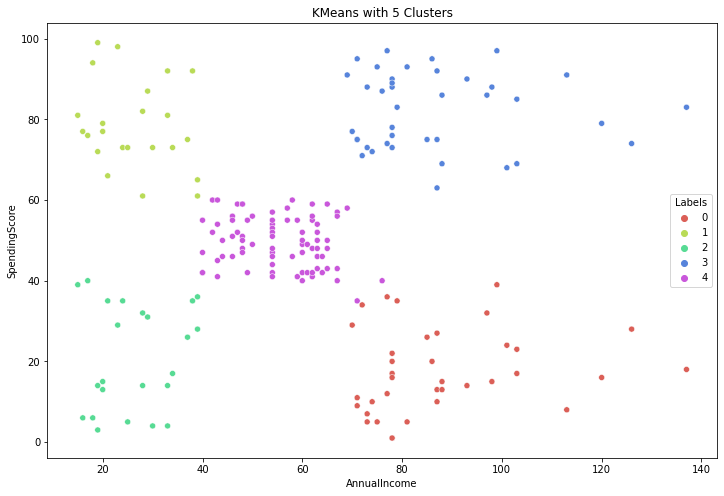

In [15]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(X['AnnualIncome'], X['SpendingScore'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.title('KMeans with 5 Clusters')
plt.show()

According to the two plots above, we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life, but by looking at the data it's safe to say that 5 clusters would be our choice because it is clearer to divide group than 3.

Label 0 is low income and low spending.  
Label 1 is high income and high spending.  
Label 2 is mid income and mid spending.  
Label 3 is high income and low spending.  
Label 4 is low income and high spending.  

# Hierarchical Clustering

In [25]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.11532778 124.49096353
  130.16143822]
 [ 42.05948169   0.          75.01999733 ... 111.78103596 137.74977314
  122.36421045]
 [ 33.03028913  75.01999733   0.         ... 129.8807145  122.20065466
  143.77412841]
 ...
 [117.11532778 111.78103596 129.8807145  ...   0.          57.14892825
   14.35270009]
 [124.49096353 137.74977314 122.20065466 ...  57.14892825   0.
   65.0999232 ]
 [130.16143822 122.36421045 143.77412841 ...  14.35270009  65.0999232
    0.        ]]


In [26]:
Z = hierarchy.linkage(dist, 'complete')

# Using the linkage class from hierarchy, pass in the parameters:
# The distance matrix
# 'complete' for complete linkage

# linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of 
# observation. The algorithm will merge the pairs of cluster that minimize this criterion.
# Value will be: 'complete'
# Note: It is recommended that try everything with 'average' as well

<ipython-input-26-86d5a961b62e>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'complete')


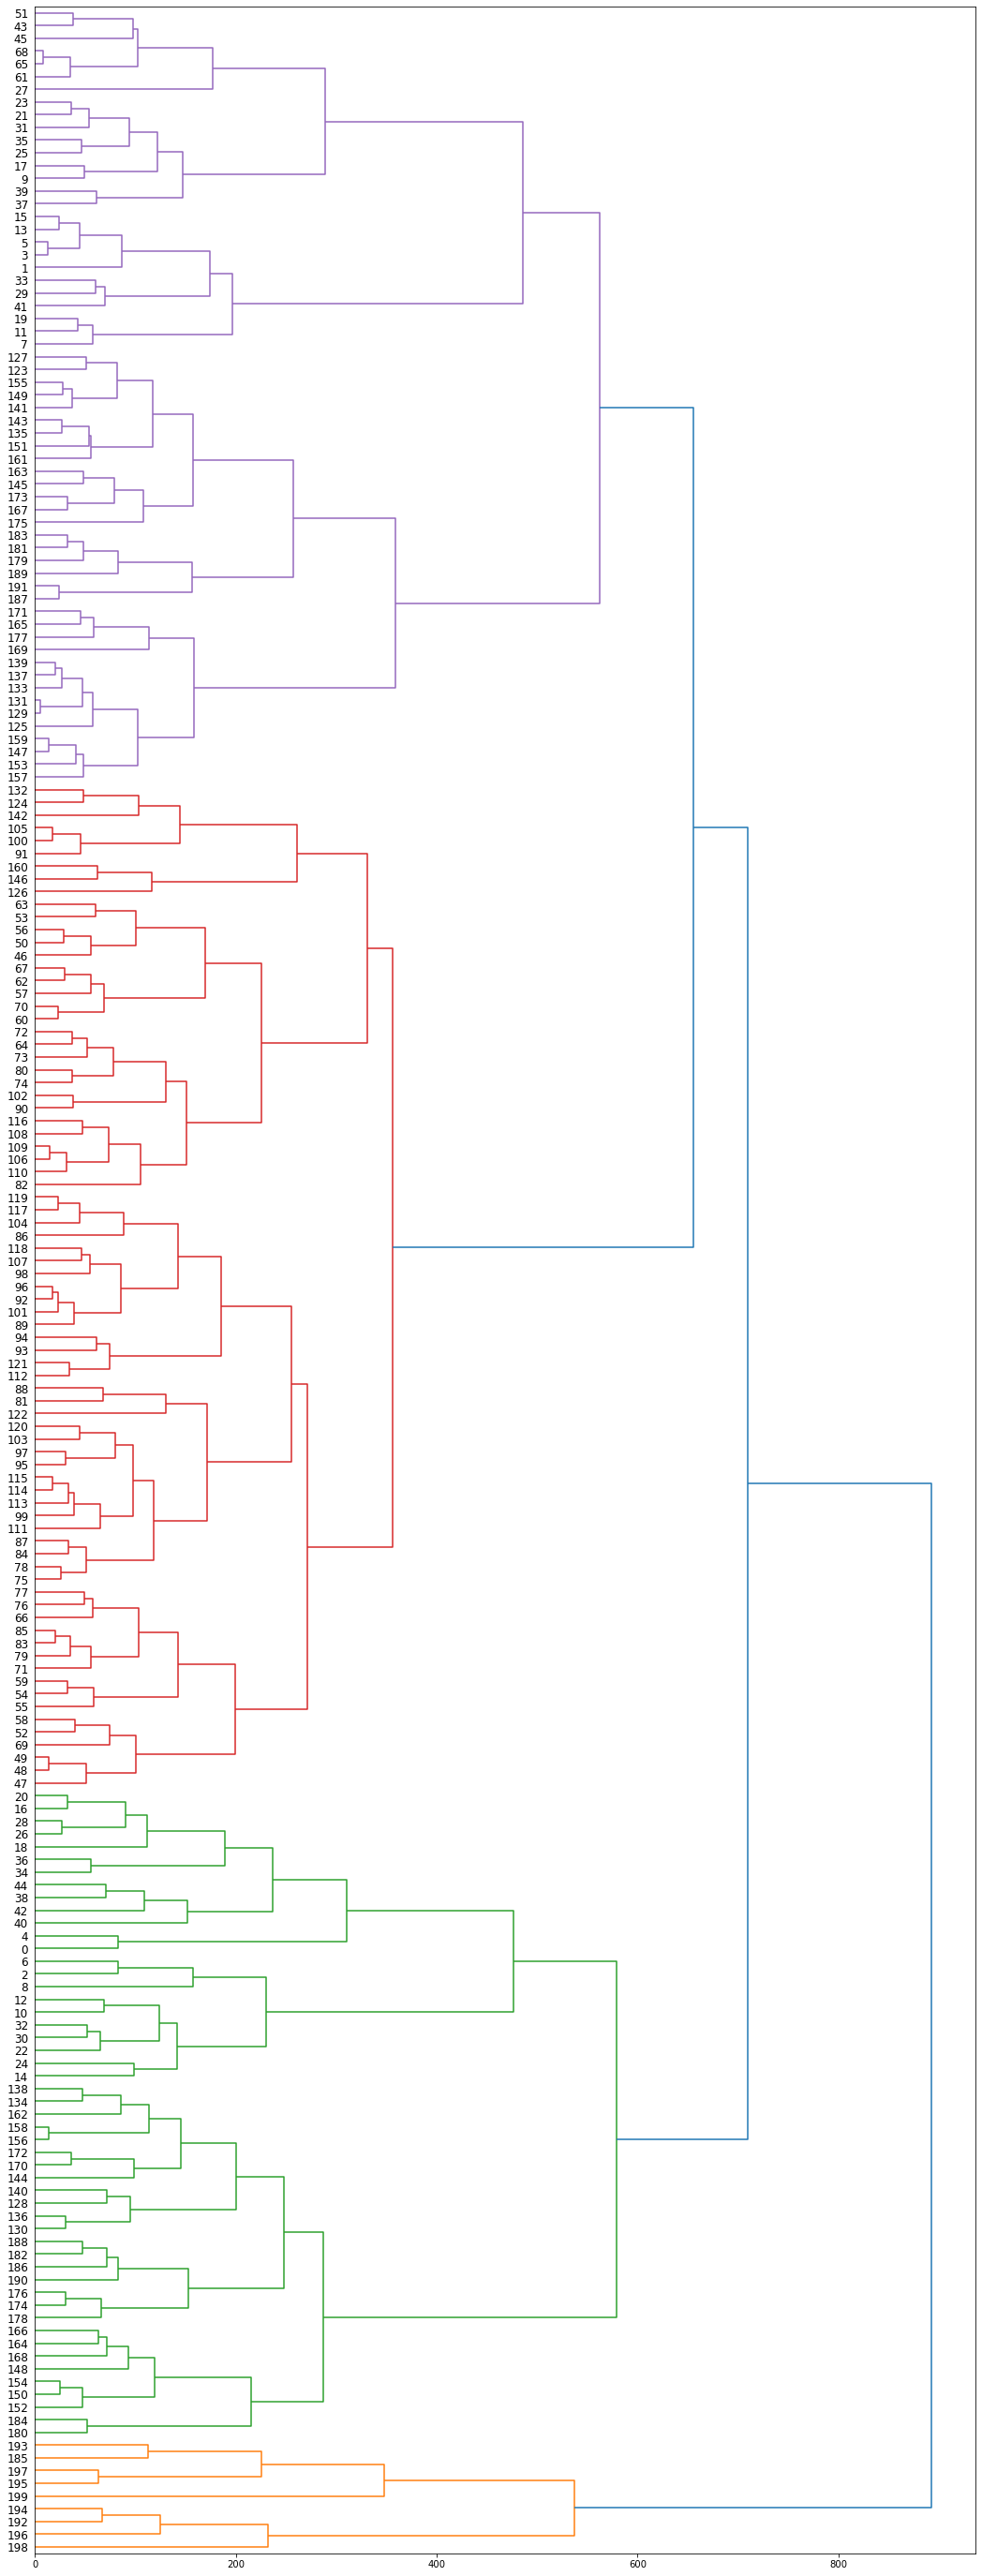

In [27]:
# A Hierarchical clustering is typically visualized as a dendrogram
# By moving up from the bottom layer to the top node, a dendrogram allows us 
# to reconstruct the history of merges that resulted in the depicted clustering.

plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

<ipython-input-28-989b8fb4e57a>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


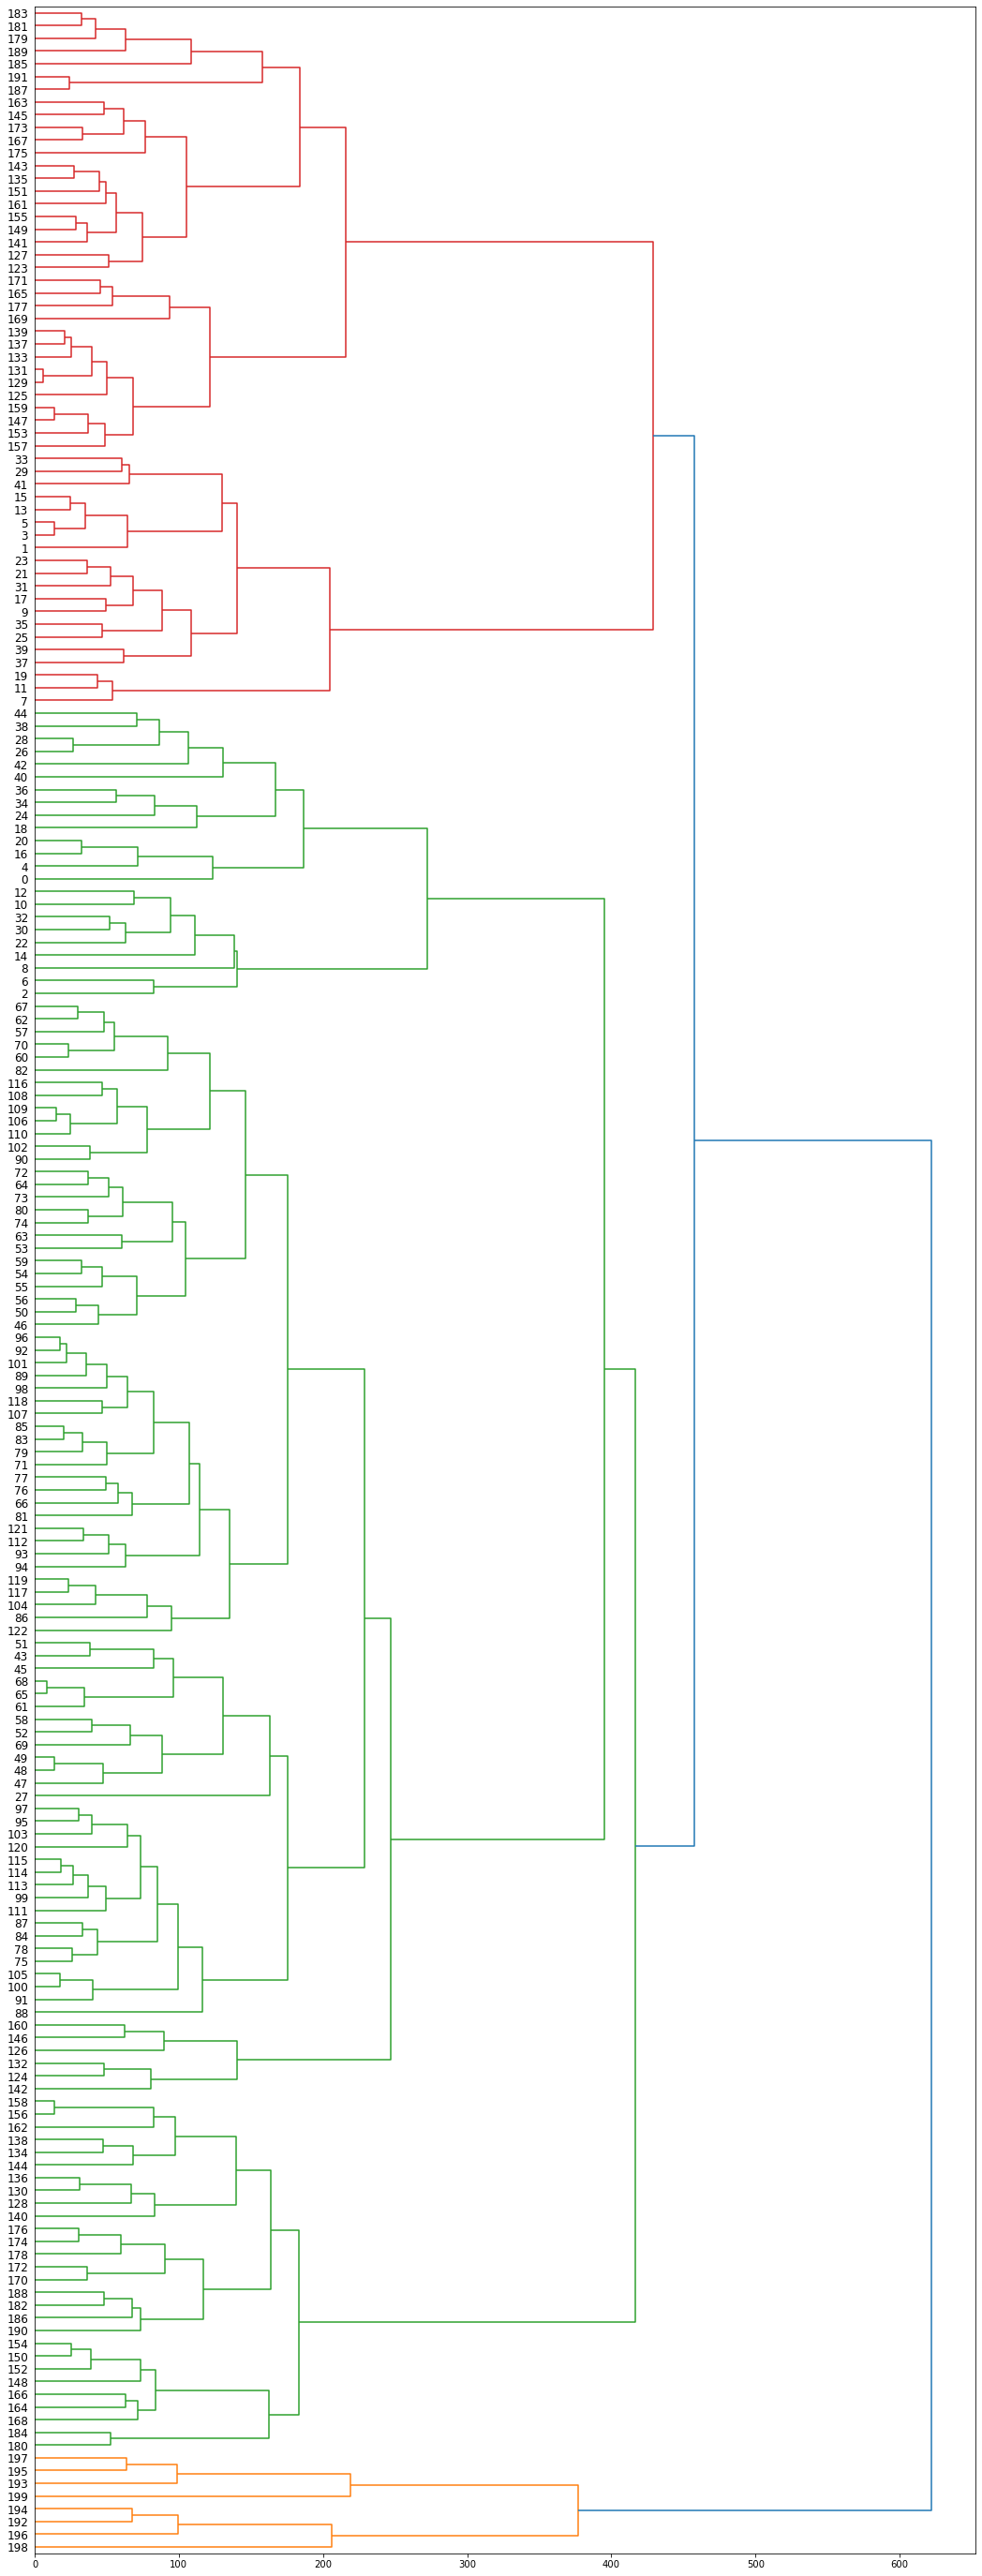

In [28]:
# try linkage = average
Z = hierarchy.linkage(dist, 'average')

plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

# Result

- In kmeans graph, we can easier to prepare our strategies because we have X-axis(AnnualIncome) and Y-axis(SpendingScore) to help us understand each groups' characteristics. On the other hand, in hierarchical graph, we can easier to find which data points are in same group because we can see the data points on the leaves.

- In short brief for the project goal, five clusters is the best and if the company want to create more profits, company can set the strategies as follow.  
  
1.For the group in right up, they have high annualincome and high spendingscore so company can give them little gift after they buy products. Because they already have high ability to purchase, company just need to keep them.  

2.For the group in right low, they have high annualincome but high spendingscore so company may send a survey to understand why they don't like to purchase in store. And fix the problems base on their survey.  

3.For the group in the middle, they have middle annualincome and spendingscore so company can send them some coupons to stimulate their buying.  

4.For the group in the left up, they have low annualincome and high spendingscore so company can give some discount to them to keep their customer loyalty.  

5.For the group in the left low, they have low annualincome and low spendingscore. Since we can't change their income, company can give them stronger discount such as buy one get one free or 60% off to attract them.  
